# Introduction

Predicting loan approval is an important problem in consumer facing finance. Bank lenders can receieve thousands to hundreds of thousands of applications from individuals with a wide variety of financial variables, leading to the necessity for automation of these loan approval processes. 
Approving loans which end up defaulting can increase financial risk, while being too conservative in lending loans can reduce business opportunity and leave valuable profits to waste. As a way to reduce these errors in the automated loan approval process, organizations rely on data driven methods and algorithms to get a better understanding of loan approval factors. 

In this project, we will explore a synthetic loan approval dataset and identify key drivers behind approval decisions, allowing us to build a predictive machine learning model to accurately determine a loan applications approval status. 

# Data Description

The dataset contains information on thousands of past loan applications, each row repesenting an individual applicant, with a mix of variables that may be related to loan approval status.

This data contains 20 features (1 id, 1 target), a distribution of 55/45 in target status, and includes real world financial approval logic (DTI ratios, Filed Defaults, etc...)  


This dataset provides a healthy combination of demographic, financial, and credit related information, making it suitable for understanding patterns in loan approvals. Before modeling, we will clean the dataset, address missing values, check for outliers, and explore some potential relationships between key features and loan outcomes.

# Data Processing and Exploration

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [52]:
df = pd.read_csv("data/Loan_approval_data_2025.csv")
df.head(5)

customer_id  age occupation_status  years_employed  annual_income  \
0  CUST100000   40          Employed            17.2          25579   
1  CUST100001   33          Employed             7.3          43087   
2  CUST100002   42           Student             1.1          20840   
3  CUST100003   53           Student             0.5          29147   
4  CUST100004   32          Employed            12.5          63657   

   credit_score  credit_history_years  savings_assets  current_debt  \
0           692                   5.3             895         10820   
1           627                   3.5             169         16550   
2           689                   8.4              17          7852   
3           692                   9.8            1480         11603   
4           630                   7.2             209         12424   

   defaults_on_file  delinquencies_last_2yrs  derogatory_marks   product_type  \
0                 0                        0                 0    Credit Card   
1                 0                        1                 0  Personal Loan   
2                 0                        0                 0    Credit Card   
3                 0                        1                 0    Credit Card   
4                 0                        0                 0  Personal Loan   

          loan_intent  loan_amount  interest_rate  debt_to_income_ratio  \
0            Business          600          17.02                 0.423   
1    Home Improvement        53300          14.10                 0.384   
2  Debt Consolidation         2100          18.33                 0.377   
3            Business         2900          18.74                 0.398   
4           Education        99600          13.92                 0.195   

   loan_to_income_ratio  payment_to_income_ratio  loan_status  
0                 0.023                    0.008            1  
1                 1.237                    0.412            0  
2                 0.101                    0.034            1  
3                 0.099                    0.033            1  
4                 1.565                    0.522            1

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [54]:
df = df.drop('customer_id', axis=1)


## Basic EDA

### Target Variable Balance

In [55]:
df["loan_status"].value_counts().reset_index()

loan_status  count
0            1  27523
1            0  22477

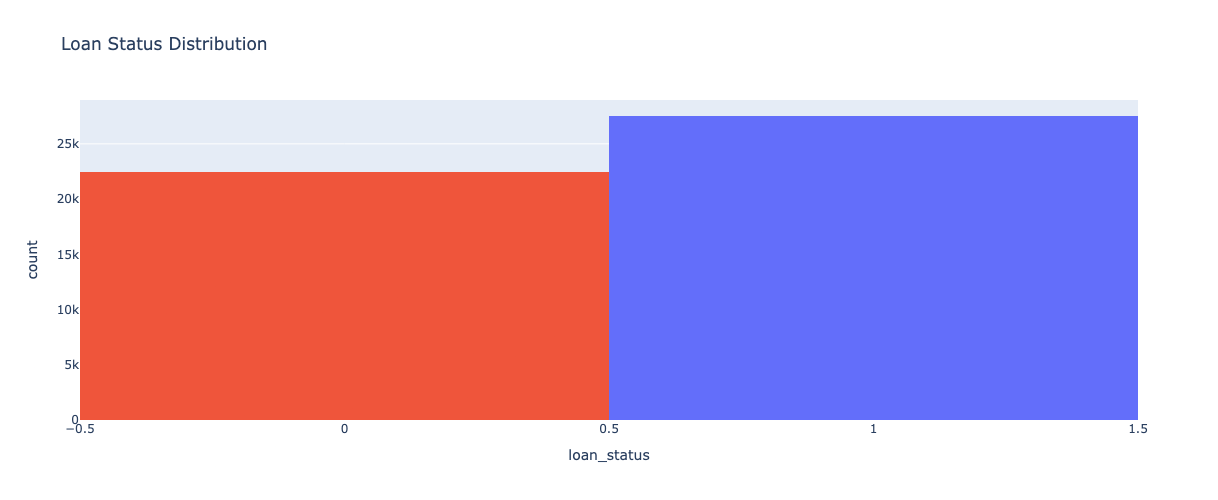

In [56]:
fig = px.histogram(
    df,
    x="loan_status",                
    title="Loan Status Distribution",
    color="loan_status",            
    category_orders={
        "loan_status": df["loan_status"].value_counts().index
    }
)

fig.update_layout(
    width=700,
    height=500,
    showlegend=False
)

fig.show()


### Univariate EDA for numerical columns

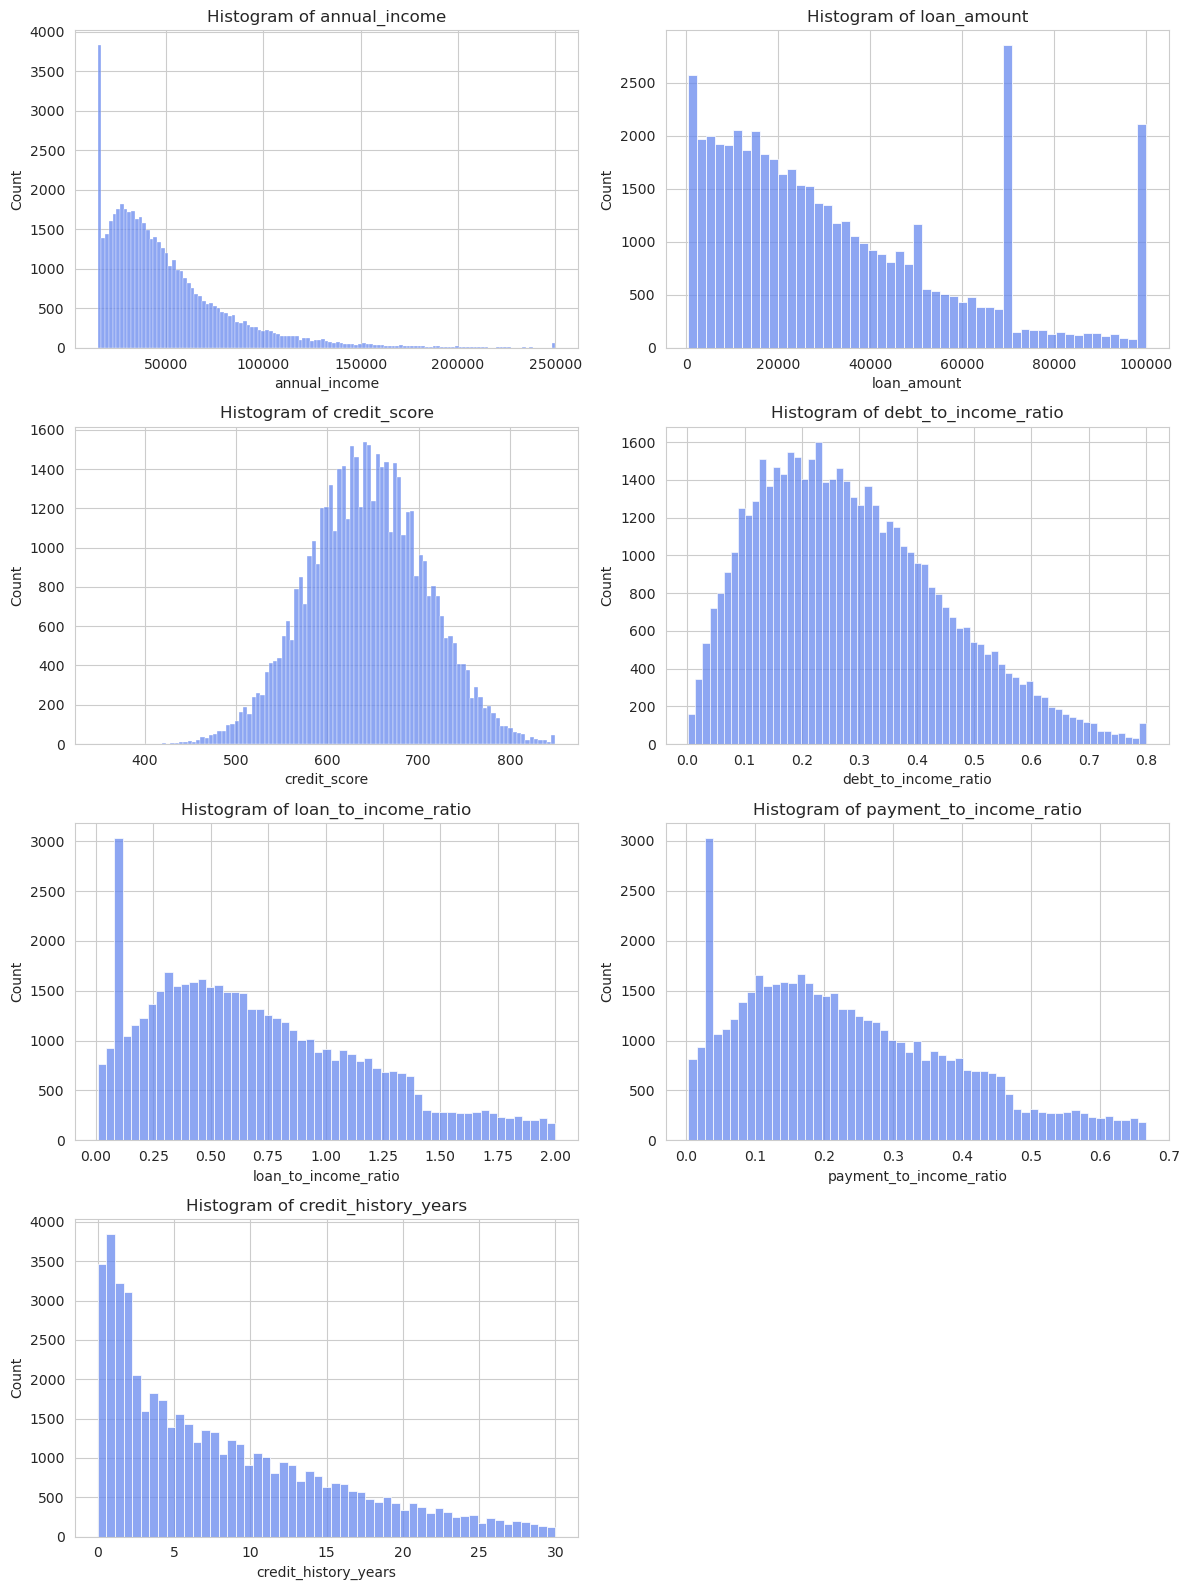

In [57]:
num_col = ["annual_income", "loan_amount", "credit_score", 
           "debt_to_income_ratio", "loan_to_income_ratio",
           "payment_to_income_ratio", "credit_history_years"]

n = len(num_col)
rows = (n + 1) // 2
plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(num_col, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[col])
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

### Correlation Heatmap

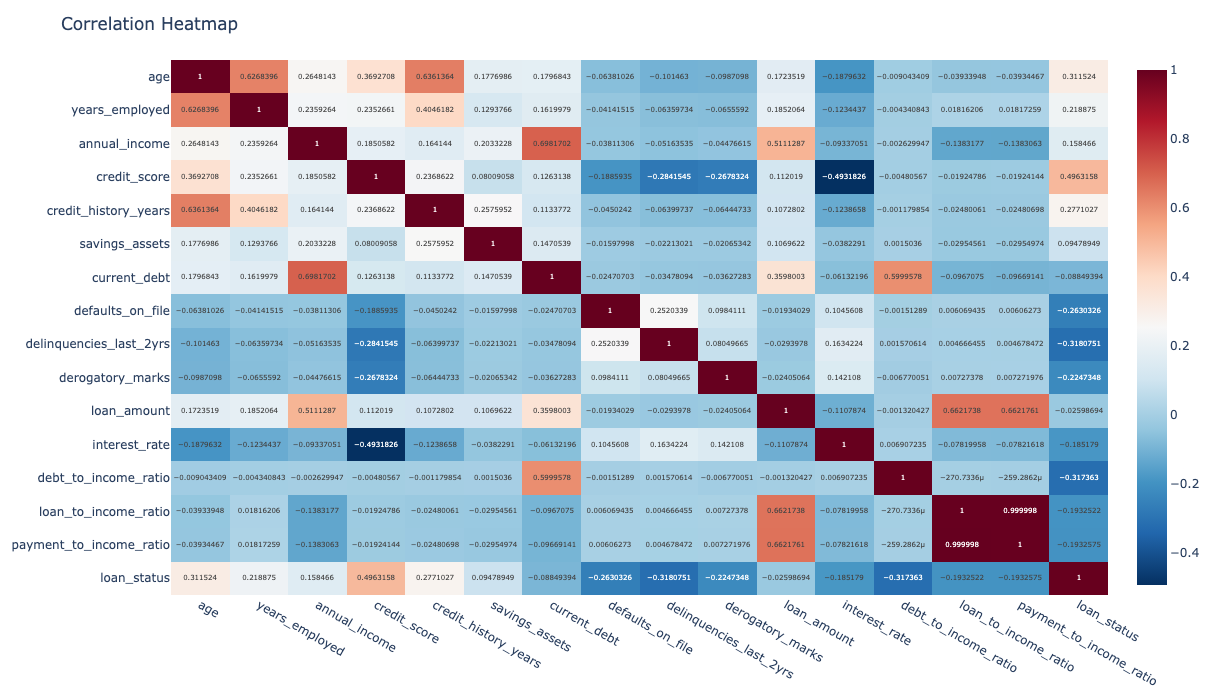

In [58]:
numeric_df = df.select_dtypes(include="number")

corr = numeric_df.corr()

fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    aspect="auto"
)

fig.update_layout(
    width=900,
    height=700,
    title="Correlation Heatmap"
)

fig.show()


### Bivariate Analysis

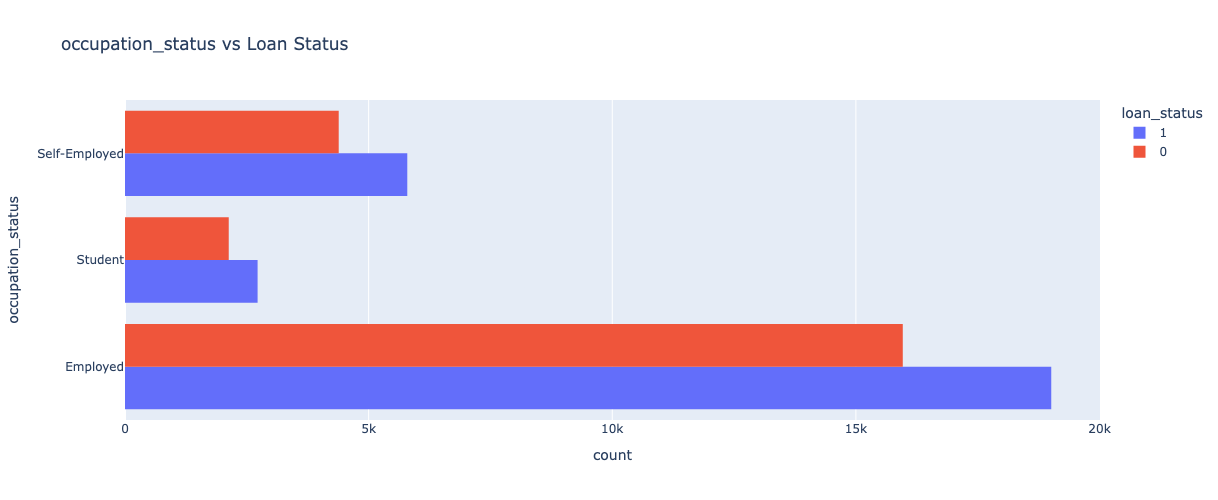

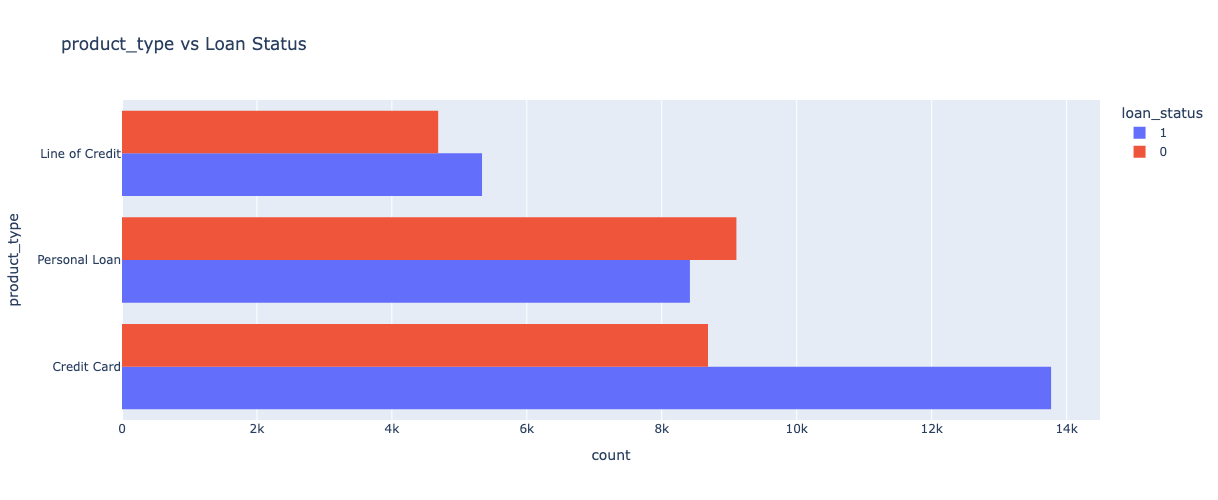

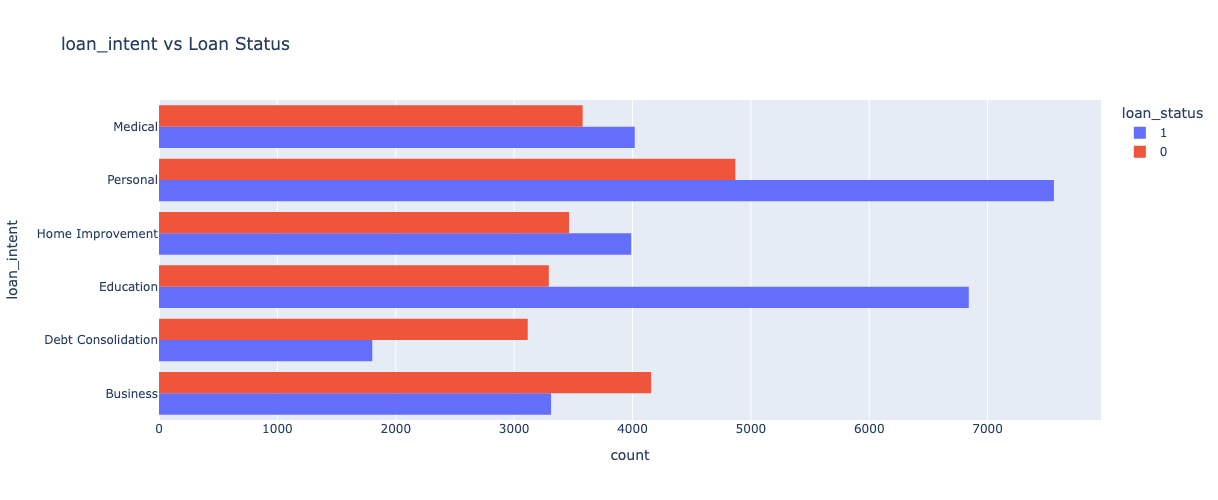

In [59]:
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

for col in categorical_cols:
    fig = px.histogram(
        df,
        y=col,
        color="loan_status",
        barmode="group",
        title=f"{col} vs Loan Status"
    )

    fig.update_layout(
        height=500,
        width=800
    )

    fig.show()


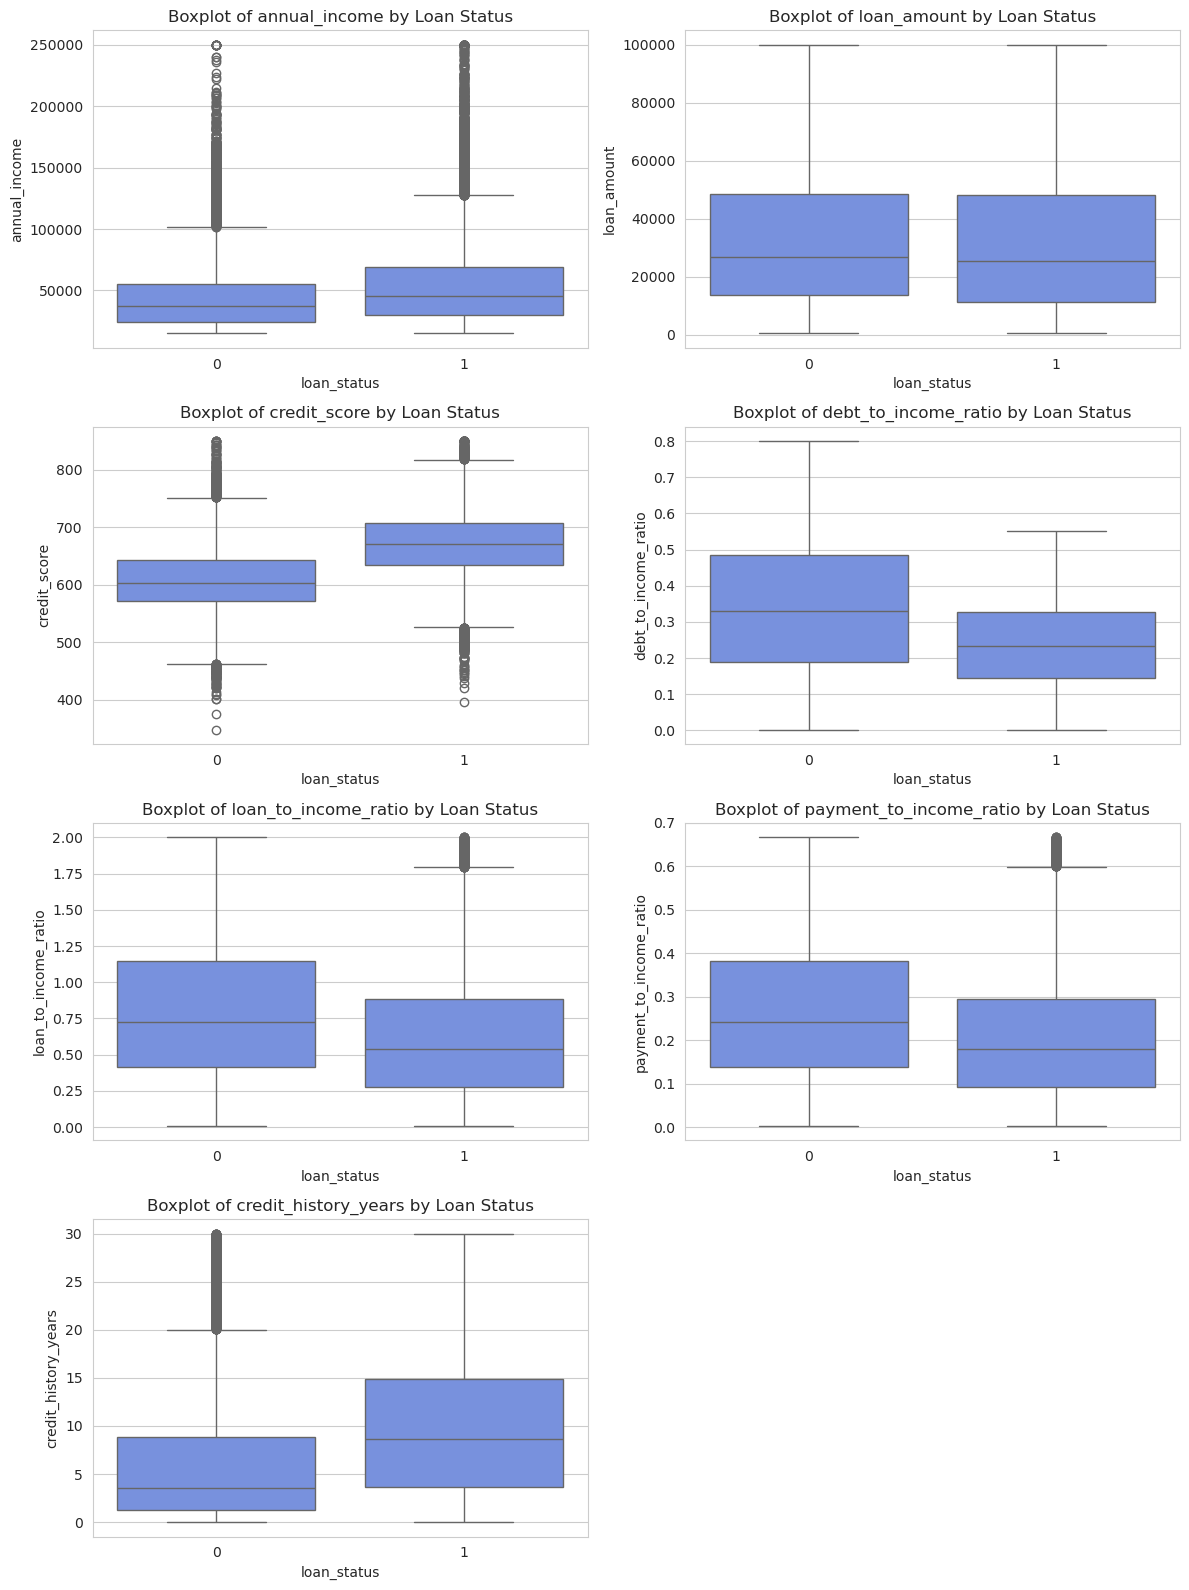

In [60]:
n = len(num_col)
rows = (n + 1) // 2

plt.figure(figsize=(12, rows * 4))

for i, col in enumerate(num_col, 1):
    plt.subplot(rows, 2, i)
    sns.boxplot(x=df['loan_status'], y=df[col])
    plt.title(f"Boxplot of {col} by Loan Status")

plt.tight_layout()
plt.show()


In [61]:
average_ratios = df.groupby("loan_status")[num_col].median().T
average_ratios

loan_status                      0          1
annual_income            37127.000  45708.000
loan_amount              26900.000  25400.000
credit_score               603.000    671.000
debt_to_income_ratio         0.329      0.232
loan_to_income_ratio         0.726      0.539
payment_to_income_ratio      0.242      0.180
credit_history_years         3.600      8.600

## Insight from EDA

Some details and insights that may be useful or interesting gathered from this exploratory data analysis.

- Most approved lendee's are on average older, longer employed, and higher credit score
- Most approved lendee's have lower debt
- Most approved lendee's have a better DTI, LTI, and PTI ratio (lower = better)
- Credit card loans on average have a higher rate of denial
- Credit history on average approved lendee's is 2x higher than those denied
  

Here we will convert our cleaned data into a csv for model training and evaluation:

In [64]:
df.to_csv('data/cleaned_data.csv', index=False)